# Analisando as notas em geral

In [38]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [39]:
notas.shape

(100836, 4)

In [40]:
# É possível redefinir os nomes das colunas

notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [41]:
notas["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [42]:
# finding all values that appears in "nota" column

notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [43]:
# finding how many times certain values appears

notas["nota"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [44]:
# finding the mean

notas["nota"].mean()

3.501556983616962

In [45]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


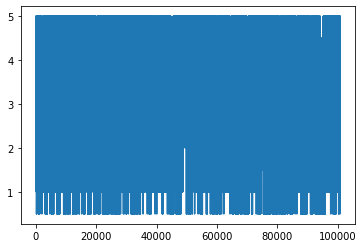

In [46]:
# Visualization

notas.nota.plot() # pandas plot graph binds all values together.

In [47]:
# Median
print("Media: {}".format(notas.nota.mean()))
print("Mediana: {}".format(notas.nota.median()))

Media: 3.501556983616962
Mediana: 3.5


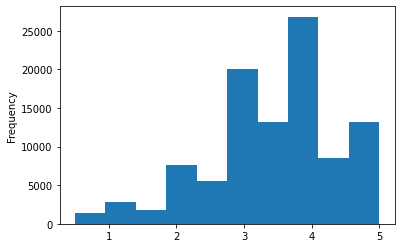

In [48]:
notas.nota.plot(kind = 'hist')

In [49]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


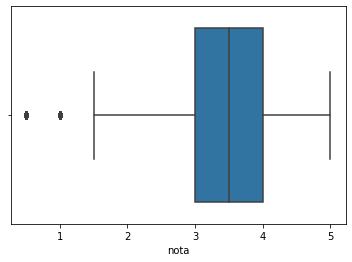

In [50]:
import seaborn as sns

sns.boxplot(notas.nota)

# Olhando os filmes

In [51]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()


,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando algumas notas específicas por filme

In [52]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [53]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [54]:
# Groupby torna o argumento do groupby() o índice do dataframe em questão e.g:
#         df.groupby("a")  // o dataframe df terá como índice a series "a".

notas.groupby("filmeId").mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [55]:
# Separar apenas valores que fazem sentido

medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

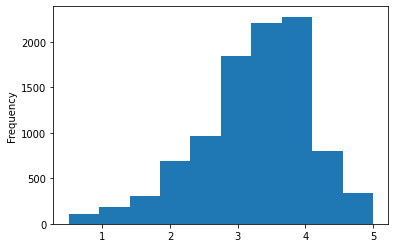

In [56]:
# Mostrar a distribuição das médias pelo .plot

medias_por_filme.plot(kind='hist')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


'\nsns.boxplot(y=medias_por_filme)\nplt.figure(figsize=(5,8))\n'

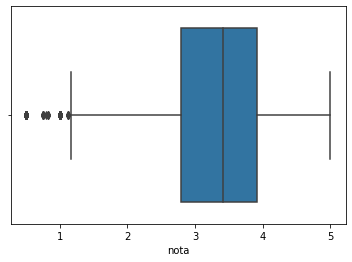

In [57]:
# Mostrar a distribuição das médias pelo sns
sns.boxplot(medias_por_filme)

# Alterando o eixo do boxblot e tamanho do gráfico utilizando pyplot
'''
sns.boxplot(y=medias_por_filme)
plt.figure(figsize=(5,8))
'''

In [58]:
# O gráfico acima representa o método .describe()

medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'\nn = 50\nsns.distplot(medias_por_filme, bins = n)\n'

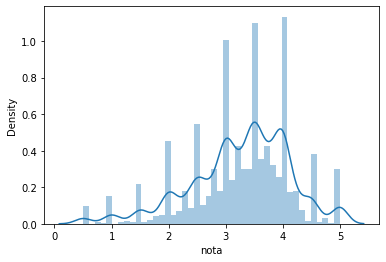

In [59]:
# Utilizando o seaborn para o fazer histograma

sns.distplot(medias_por_filme)

# Alterando a quantidade de bins (discretizaçao do eixo x)
'''
n = 50
sns.distplot(medias_por_filme, bins = n)
'''

Text(0.5, 1.0, 'Histograma das médias dos filmes')

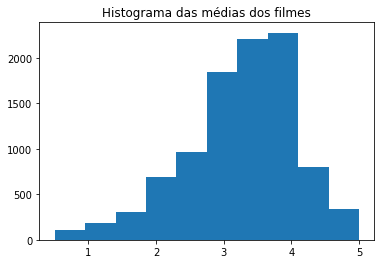

In [60]:
# Utilizando o pyplot

import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

# Filmes do TMDB

In [61]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [62]:
# Variáveis categóricas nominais -> não existe ordem

tmdb.original_language.unique()

# Também existem variáveis categóricas ordinais -> existe ordem

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [63]:
# Variáveis quantitativas (Contínuas ou discretas)

tmdb.budget.unique()  # Contínua

array([237000000, 300000000, 245000000, 250000000, 260000000, 258000000,
       280000000, 270000000, 200000000, 255000000, 225000000, 220000000,
       380000000, 215000000, 180000000, 207000000, 209000000, 150000000,
       210000000, 170000000, 190000000, 195000000, 105000000, 185000000,
       175000000, 140000000, 176000003, 178000000, 145000000,  27000000,
       165000000, 160000000,  15000000,  38000000, 155000000, 149000000,
       144000000,  70000000, 100000000, 139000000, 135000000, 130000000,
       137000000, 120000000, 132000000, 110000000, 125000000, 127500000,
       127000000, 103000000,  65000000, 123000000, 115000000, 117000000,
       113000000,  97250400, 116000000, 112000000,  93000000, 107000000,
               0, 133000000, 108000000, 126000000,  90000000, 102000000,
        80000000,  84000000,  99000000,  10000000,  98000000,  94000000,
        85000000,  92000000,  95000000,  79000000,  75000000,  88000000,
        68000000,  20000000,  87000000,  60000000, 

In [64]:
# Variável quantitativa discreta

votes = tmdb.vote_count
votes.head()

0    11800
1     4500
2     4466
3     9106
4     2124
Name: vote_count, dtype: int64

# Visualização de dados

In [65]:
# Isto é apenas uma única série que contém seus .index e .values

tmdb["original_language"].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ar       2
id       2
ro       2
cs       2
ta       2
sl       1
pl       1
ky       1
tr       1
ps       1
te       1
no       1
af       1
hu       1
xx       1
is       1
nb       1
vi       1
el       1
Name: original_language, dtype: int64

In [66]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'fa', 'nl', 'he', 'th', 'ar', 'id', 'ro', 'cs', 'ta', 'sl',
       'pl', 'ky', 'tr', 'ps', 'te', 'no', 'af', 'hu', 'xx', 'is', 'nb', 'vi',
       'el'],
      dtype='object')

In [67]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [68]:
# Transformar série em dataframe

tmdb["original_language"].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ko,11


In [69]:
# Transformar o índice em coluna

tmdb["original_language"].value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ko,11


In [70]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language","total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


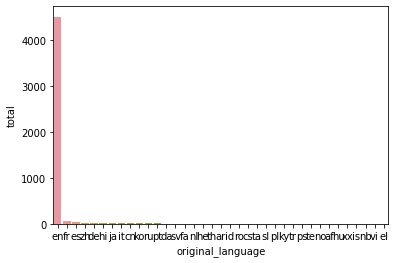

In [72]:
# Plotar gráficos categóricos

sns.barplot(x="original_language", y = "total", data = contagem_de_lingua)

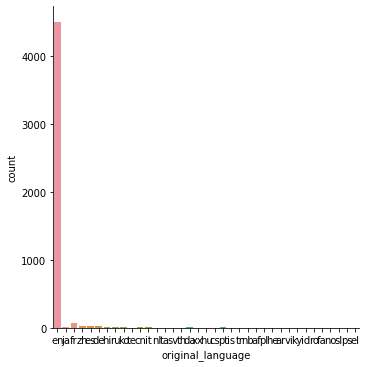

In [73]:
sns.catplot(x="original_language", kind="count", data = tmdb)